In [216]:
import numpy as np
import pandas as pd
from pylab import mpl, plt
import os

EOD data head


,AAPL,IBM,MSFT,NKE
date,,,,
2014-02-21,68.9821,152.3849,33.7870,36.0905
2014-02-24,69.2841,152.9351,33.5290,36.7323
2014-02-25,68.5631,152.7517,33.3956,36.8597
2014-02-26,67.9446,153.4436,33.3333,37.0060
2014-02-27,69.2999,154.4523,33.6803,36.9302


description


,AAPL,IBM,MSFT,NKE
min,67.94,104.41,33.33,33.53
mean,128.63,140.75,62.48,55.82
max,230.28,166.96,114.62,85.40
std,38.22,12.80,23.72,12.12


plot


<AxesSubplot: xlabel='date'>

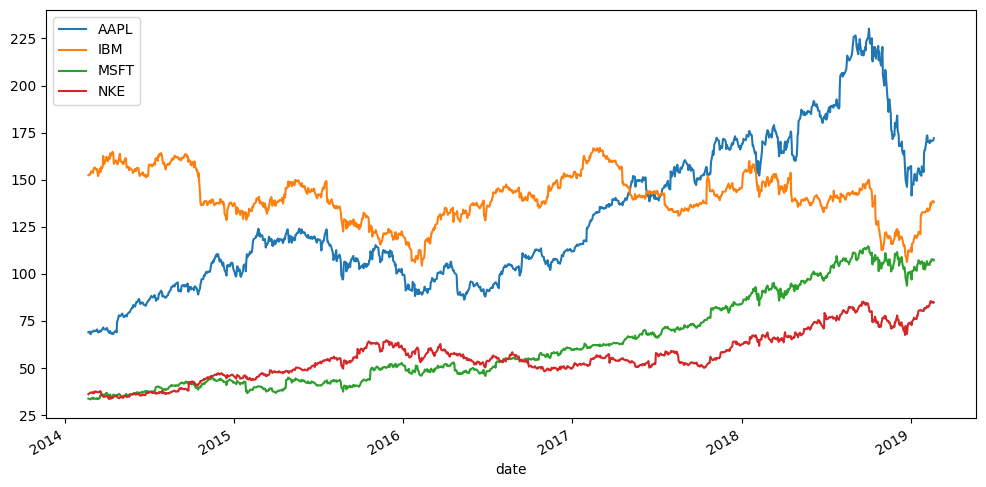

In [217]:
# get EOD data
eod = pd.DataFrame()
for name in ['AAPL','IBM','MSFT','NKE']:
    raw = pd.read_csv(name+'.csv', index_col=0, parse_dates=True)
    raw = raw[['close']]
    raw.rename({'close': name}, axis=1, inplace=True)
    eod = pd.concat([eod, raw], axis=1)

print('EOD data head')
display(eod.head())
print('description')
display(eod.aggregate([min, np.mean, max, np.std]).round(2))
print('plot')
eod.plot(figsize=(12,6))

Text(0.5, 1.0, 'Cumulative weekly log returns')

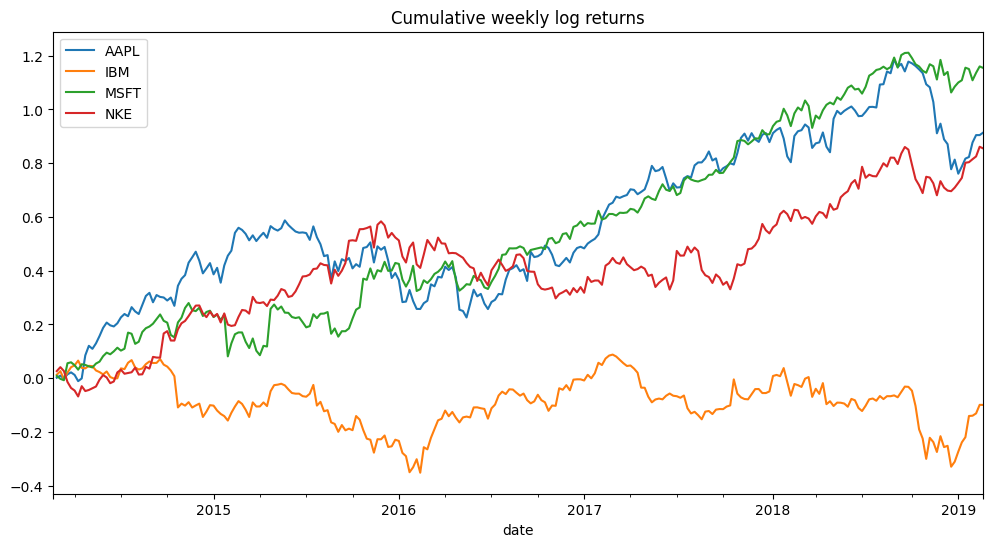

In [218]:
# get weekly cumulative log returns and plot
weekly_avg = eod.resample('1w', label='right').last()
weekly_log_returns = np.log(weekly_avg / weekly_avg.shift(1))

fig, ax = plt.subplots()
fig.set_size_inches(12,6)

weekly_log_returns.cumsum().plot(ax=ax)
ax.set_title('Cumulative weekly log returns')


,AAPL,mean,std,EWMA
date,,,,
2019-02-13,170.18,162.748450,8.045626,170.283721
2019-02-14,170.80,163.574535,7.978080,170.670930
2019-02-15,170.42,164.335820,7.861922,170.482733
2019-02-19,170.93,165.074810,7.745774,170.818183
2019-02-20,172.03,166.044045,7.309103,171.727046


<AxesSubplot: title={'center': 'AAPL std'}, xlabel='date'>

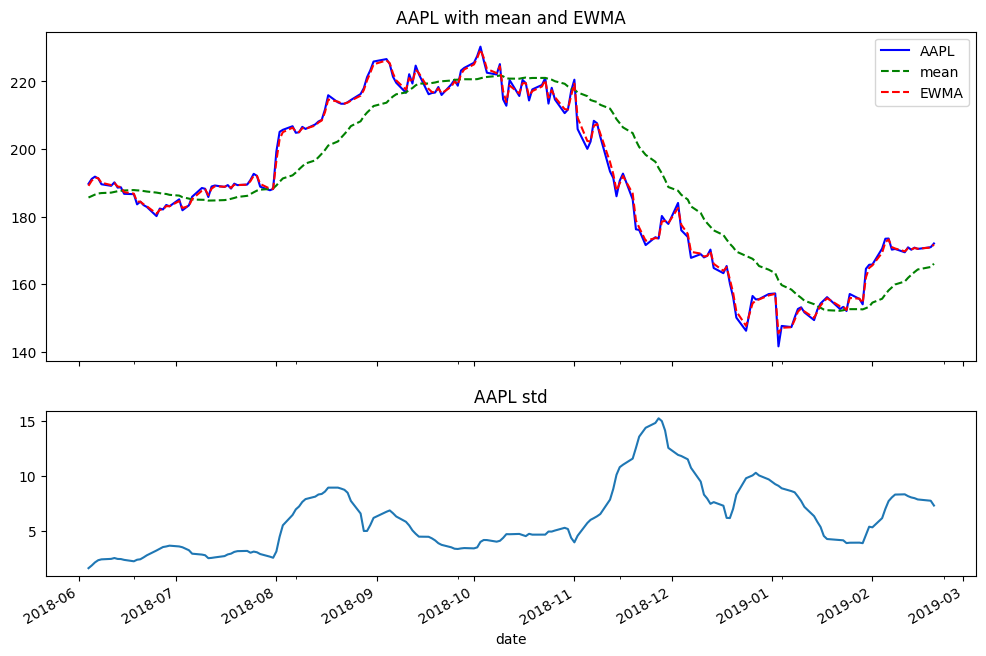

In [219]:
# get rolling statistics of mean, std and EWM
aapl = pd.DataFrame(eod['AAPL'])
window = 20
aapl['mean'] = aapl['AAPL'].rolling(window=window).mean()
aapl['std'] = aapl['AAPL'].rolling(window=window).std()
aapl['EWMA'] = aapl['AAPL'].ewm(halflife=0.5, min_periods=window).mean()
display(aapl.tail())

year_aapl = aapl[aapl.index > '2018-06-01']

fig, ax = plt.subplots(nrows=2, gridspec_kw={'height_ratios':[2,1]}, sharex=True)
fig.set_size_inches(12,8)

year_aapl[['AAPL','mean','EWMA']].plot(ax=ax[0], 
                            style=['b','g--','r--'], title='AAPL with mean and EWMA')
year_aapl['std'].plot(ax=ax[1], title='AAPL std')

<AxesSubplot: >

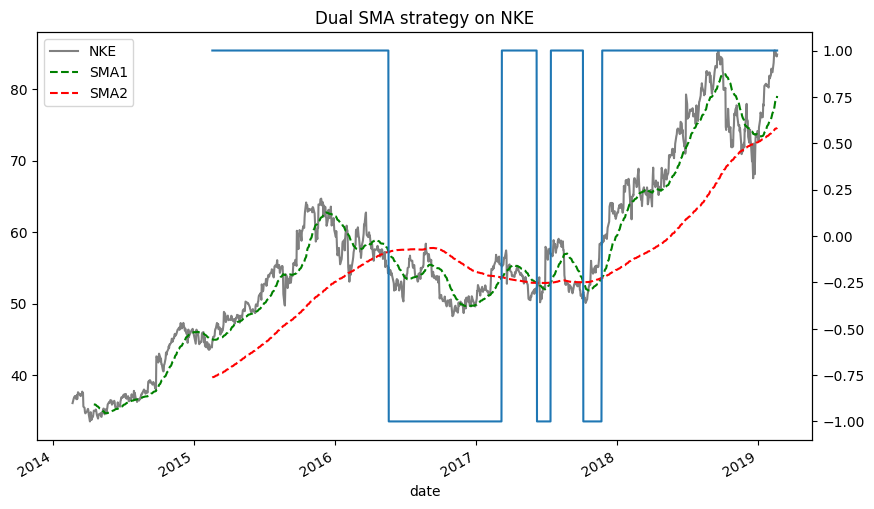

In [220]:
# Dual simple moving averages
nke = pd.DataFrame(eod['NKE'])
nke['SMA1'] = nke.NKE.rolling(window=40).mean()
nke['SMA2'] = nke.NKE.rolling(window=250).mean()

fig, ax = plt.subplots()
fig.set_size_inches(10,6)

nke.plot(ax=ax, style=['grey','g--','r--'], title='Dual SMA strategy on NKE')

nke.dropna(inplace=True)
nke['strategy'] = np.where(nke.SMA1 > nke.SMA2, 1, -1)

nke.strategy.plot(ax=ax, secondary_y='strategy')